# Randomness in sink

## imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sqlite3

In [2]:
import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

In [3]:
fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

palette = ['#507fb5', '#b5507f', '#7fb550', '#b58650']


## utils

In [4]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    transactions = evaler.eval('TransactionQuantity')
    agents = evaler.eval('Agents')
    
    storage_id = agents.loc[agents["Prototype"] == "SomeSink"]["AgentId"]
    transaction_subset = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_s': transaction_subset}
    
    return name, data

## input file names below

In [5]:
filenames = ['no-behavior.sqlite',
             'rbsa_0.sqlite',
             'rbsa_1.sqlite',
             'rbsa_2.sqlite',
             'rbsa_3.sqlite',
             'rbsa_4.sqlite',
             'rbsa_5.sqlite',
             'rbsa_6.sqlite',
             'rbsa_7.sqlite',
             'rbsa_8.sqlite',
             'rbsa_9.sqlite',
             'rbsa_10.sqlite']


## grab all data

In [6]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

# Plots
## transactions subplots

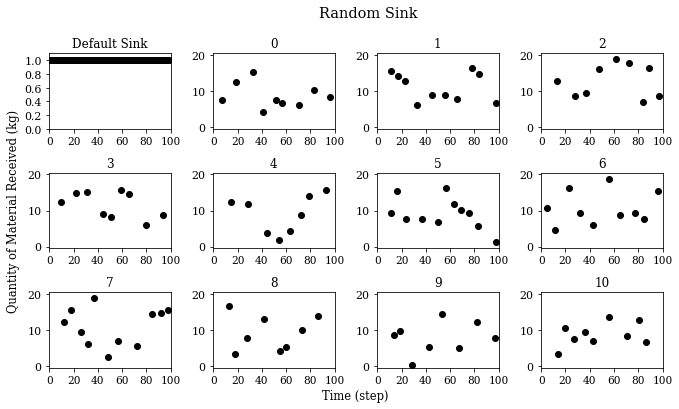

In [7]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(341)
plt.xlim(-0.5,100)
plt.ylim(0,1.1)
ax0.set_xticks(np.arange(0, 101, 20))
ax0.set_yticks(np.arange(0, 1.11, 0.2))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= 'k')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(342, sharex=ax0)#, sharey=ax0)

ax1.scatter(data['rbsa_0']['t_s']['Time'],
            data['rbsa_0']['t_s']['Quantity'],
            color= 'k')
ax1.set_title('0')
ax1.set_ylim([-0.5,20.5])

for i in range(1,11):
    ax_n = fig.add_subplot(3,4,i+2, sharex=ax0, sharey=ax1)
    ax_n.scatter(data['rbsa_' + str(i)]['t_s']['Time'],
            data['rbsa_' + str(i)]['t_s']['Quantity'],
            color= 'k')
    ax_n.set_title(str(i))


fig.suptitle('Random Sink', x=0.55)
fig.tight_layout()

#plt.savefig('transactions-subplots', transparent=True)


## Cumulative received subplots

In [8]:
data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()

for i in range(0,11):
    data['rbsa_' + str(i)
        ]['t_s']['CumQuant'] = data['rbsa_' + str(i)
                                   ]['t_s']['Quantity'].cumsum()
    

In [9]:
data['rbsa_0']['t_s']

,SimId,TransactionId,ResourceId,ObjId,TimeCreated,Time,SenderId,ReceiverId,Commodity,Units,Quantity,CumQuant
0,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,0,12,11,7,7,10,11,commodity,kg,7.438620,7.438620
1,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,1,28,26,19,19,10,11,commodity,kg,12.430378,19.868998
2,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,2,46,43,33,33,10,11,commodity,kg,15.174146,35.043144
3,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,3,58,54,41,41,10,11,commodity,kg,4.181561,39.224705
4,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,4,73,68,52,52,10,11,commodity,kg,7.381924,46.606630
5,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,5,82,76,57,57,10,11,commodity,kg,6.731229,53.337858
6,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,6,100,93,71,71,10,11,commodity,kg,6.036070,59.373928
7,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,7,116,108,83,83,10,11,commodity,kg,10.383229,69.757157
8,0f6ef03c-1761-46ab-ac6b-e9cbaeef5a7c,8,133,124,96,96,10,11,commodity,kg,8.304385,78.061542


## Cumulative single plot

Text(0.5, 1.0, 'Random Sink')

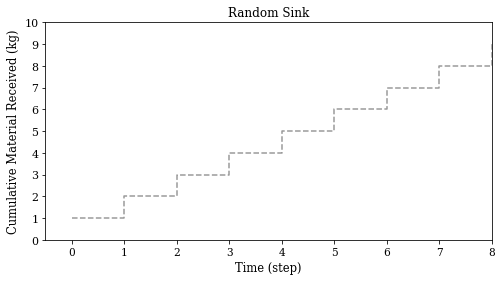

In [10]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,8)
plt.ylim(0,10)
ax.set_xticks(np.arange(0, 9, 1))
ax.set_yticks(np.arange(0, 11, 1))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='post',
        color= '0.6',
        ls='dashed', 
        label='Default Behavior')



#ax.legend(loc = 'upper left')

plt.title('Random Sink')

#plt.savefig('cumulative-oneplot', transparent=True)


Text(0.5, 1.0, 'Stairs')

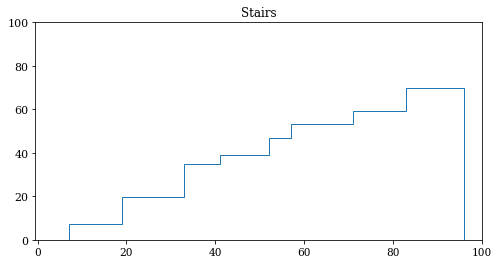

In [11]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
plt.xlim(-0.5,100)
plt.ylim(0,100)

ax.stairs(edges=data['rbsa_0']['t_s']['Time'],
        values=data['rbsa_0']['t_s']['CumQuant'].iloc[:-1]
         )

plt.title("Stairs")


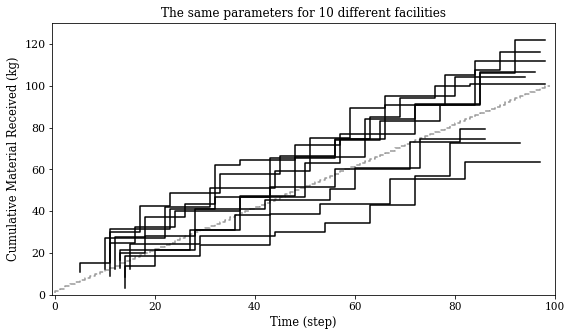

In [16]:
fig = plt.figure(figsize = (9, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,100)
plt.ylim(0,130)
ax.set_xticks(np.arange(0, 101, 20))
ax.set_yticks(np.arange(0, 131, 20))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre',
        color= '0.6',
        ls='dashed', 
        label='Default Behavior')

for i in range(1,11):
    ax.step(data['rbsa_' + str(i)]['t_s']['Time'],
            data['rbsa_' + str(i)]['t_s']['CumQuant'],
            where='pre',
            color= 'k',
            label= str(i))

# for i in range(1,11):
#     ax.stairs(edges=data['rbsa_' + str(i)]['t_s']['Time'],
#             values=data['rbsa_' + str(i)]['t_s']['CumQuant'].iloc[:-1],
#             label= str(i))
    
#ax.legend(loc = 'upper left')

plt.title('The same parameters for 10 different facilities')

plt.savefig('plots/cumulative-oneplot', transparent=True, dpi=600)


In [ ]:
len(data['rbsa_10']['t_s'])

## Final amount received

In [ ]:
final_amount = []
for i in range(0,11):
    final_amount.append(data['rbsa_' + str(i)]['t_s']['CumQuant'].iloc[-1],)

In [ ]:
sns.boxplot(final_amount)

## Time between and size

In [ ]:
data['no-behavior']['t_s']['TimeBetweenReqs'] = data['no-behavior']['t_s']['Time'].diff()

for i in range(0,11):
    data['rbsa_' + str(i)
        ]['t_s']['TimeBetweenReqs'] = data['rbsa_' + str(i)
                                          ]['t_s']['Time'].diff()

In [ ]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

# plt.xlim(-0.5,100)
# plt.ylim(0,120)
# ax.set_xticks(np.arange(0, 101, 20))
# ax.set_yticks(np.arange(0, 121, 20))


ax.scatter(data['no-behavior']['t_s']['TimeBetweenReqs'],
        data['no-behavior']['t_s']['Quantity'],
        color= '0.6',
        label='Default Behavior')

ax.scatter(data['rbsa_0']['t_s']['TimeBetweenReqs'],
        data['rbsa_0']['t_s']['Quantity'],
        color= 'k',
        label='Default Behavior')


#ax.legend(loc = 'upper left')

#plt.title('Random Sink')

#plt.savefig('cumulative-oneplot', transparent=True)


In [ ]:
multiple_timesteps = ['rbsa_1000.sqlite',
                      'rbsa_10000.sqlite',
                      'rbsa_100000.sqlite']

mts = {}
for file in multiple_timesteps:
    (name, file_data) = get_data(file)
    mts[name] = file_data

In [ ]:
mts['rbsa_100000']['transactions']


In [ ]:
for i in ['1000', '10000', '100000']:
    mts['rbsa_' + i
       ]['t_s']['TimeBetweenReqs'] = mts['rbsa_' + i
                                        ]['t_s']['Time'].diff()


In [ ]:
mts['rbsa_1000']['t_s']

In [ ]:
sns.jointplot(mts['rbsa_1000']['t_s'],
            x="TimeBetweenReqs",
            y="Quantity",
            #kind='kde',
            #levels=6
             )
plt.suptitle('1,000 time steps')

sns.jointplot(mts['rbsa_1000']['t_s'],
            x="TimeBetweenReqs",
            y="Quantity",
            kind='kde',
            levels=6
             )
plt.suptitle('1,000 time steps')


In [ ]:
sns.jointplot(mts['rbsa_10000']['t_s'],
            x="TimeBetweenReqs",
            y="Quantity",
             )
plt.suptitle('10,000 time steps')

sns.jointplot(mts['rbsa_10000']['t_s'],
            x="TimeBetweenReqs",
            y="Quantity",
            kind='kde',
            levels=6
             )
plt.suptitle('10,000 time steps')

In [ ]:
sns.jointplot(mts['rbsa_100000']['t_s'],
            x="TimeBetweenReqs",
            y="Quantity",
            kind='kde',
            levels=6)
plt.suptitle('100,000 time steps')



In [25]:
len(mts['rbsa_100000']['t_s'])

1347